A Neural Network is an unsupervised AI machine learning algorithim that attempts to model the human brain. Steps to making a Neural Network include: preparing your data, defining the network architecture, initializing weights and biases, training the network using forward and backward propagation, evaluating the model on test data, and potentially optimizing the network parameters.

To check performance of a Neural Network you should use a separate test dataset by comparing its predicted outputs to known truth values, measuring on accuracy, loss functions, confusion matrices, and ROC curves. We use a separate test data set becuase it prevents bias results and overfitting and it ensures that the model can predict on new data and not just what it was trained on. 

In [105]:
import pandas as pd
import numpy as np
cdl_df = pd.read_csv("Credit_card_label.csv")
cd_df = pd.read_csv("Credit_card.csv")
cd_df.head(3)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2


Checking and resolving null values

In [106]:
cd_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [107]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
cols_to_impute_numeric = ['Annual_income','Birthday_count']
cd_df[cols_to_impute_numeric] = imputer.fit_transform(cd_df[cols_to_impute_numeric])
    

imputer =  SimpleImputer(missing_values=np.nan, strategy = 'most_frequent' )
cols_to_impute_string = ['GENDER','Type_Occupation']
cd_df[cols_to_impute_string] = imputer.fit_transform(cd_df[cols_to_impute_string])
cd_df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

Merging the data set on the shared column so that we can see the outcomes in relation to all the columns.

In [108]:
df = pd.merge(cd_df, cdl_df, on='Ind_ID', how="outer")
df = df.drop(columns=['Ind_ID','Mobile_phone'], axis=1)
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Laborers,2,1
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0


In [109]:
number_columns = ['GENDER', 'Car_Owner', 'Propert_Owner']
other_columns = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in number_columns:
    df[i] = le.fit_transform(df[i])
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Laborers,2,1
1,0,1,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,0,0,1,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0


In [111]:
df = pd.get_dummies(df, columns = other_columns, dtype=int)
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.0,-18772.0,365243,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,2,135000.0,-15761.0,-3173,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,247500.0,-17016.0,-1347,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df["label"].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('label', axis = 1)
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [114]:
from imblearn.under_sampling import ClusterCentroids
rus = ClusterCentroids(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train, Y_train)
model = LogisticRegression(random_state=42)
model.fit(X_resampled, Y_resampled)

c:\Users\tonyp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

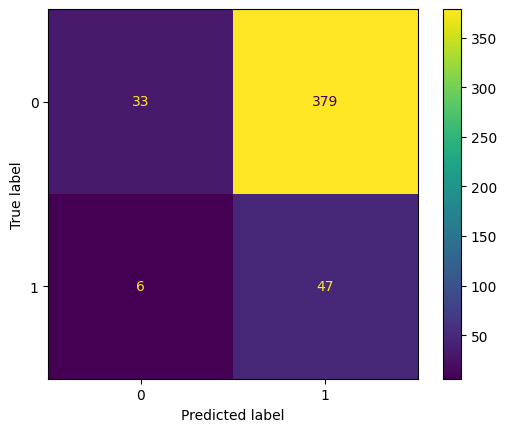

In [115]:
Y_pred = model.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

In [116]:
47/(47+6)

0.8867924528301887

In [119]:
import torch
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [120]:
import torch.nn as nn
import torch.nn.functional as F


X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

tensor([[0., 0., 1.,  ..., 0., 1., 0.],
        [1., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [121]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 
    
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [122]:
torch.manual_seed(42)
ann = ANN_Model()

In [123]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [ ]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1083x49 and 8x20)

In [125]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x49 and 8x20)

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [465, 0]

I am not sure where my error is with implementing the Neural Network but I think that the Neural Network (if working) would probably yield higher accuracy as it is a more complex model that utilizes multiple fliters.